In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [43]:
os.chdir('D:/emppred')

In [44]:
os.getcwd()

'D:\\emppred'

In [45]:
df = pd.read_csv('adult.csv')
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [46]:
df.shape

(32561, 15)

In [47]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [48]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [49]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

In [50]:
num = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include="object")

In [51]:
num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

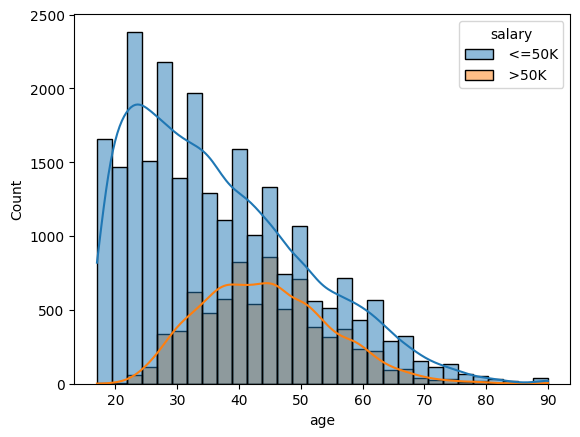

In [52]:
sns.histplot(data=df,x='age',hue='salary',kde=True,bins=30)

<Axes: xlabel='hours-per-week', ylabel='Count'>

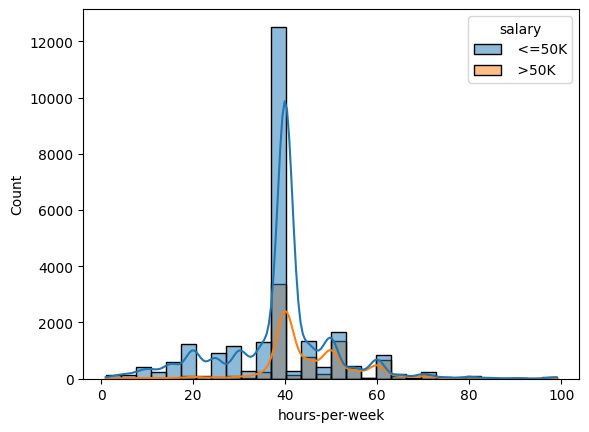

In [53]:
sns.histplot(data=df,x='hours-per-week',hue='salary',kde=True,bins=30)

<Axes: xlabel='fnlwgt', ylabel='Count'>

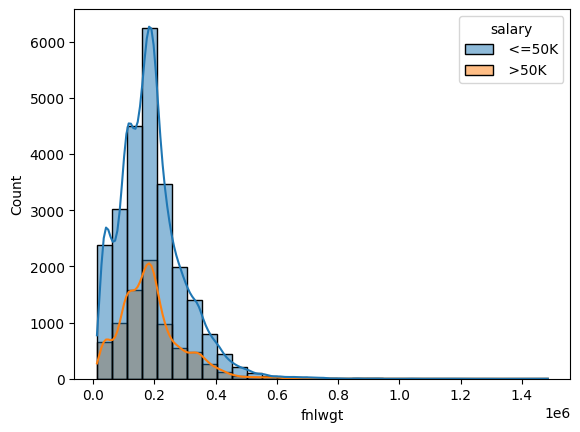

In [54]:
sns.histplot(data=df,x='fnlwgt',hue='salary',kde=True,bins=30)

<Axes: xlabel='salary', ylabel='count'>

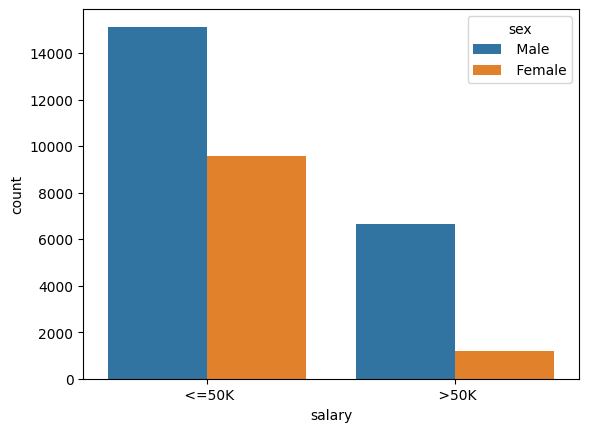

In [55]:
sns.countplot(data=df,x='salary',hue='sex')

<Axes: xlabel='salary', ylabel='count'>

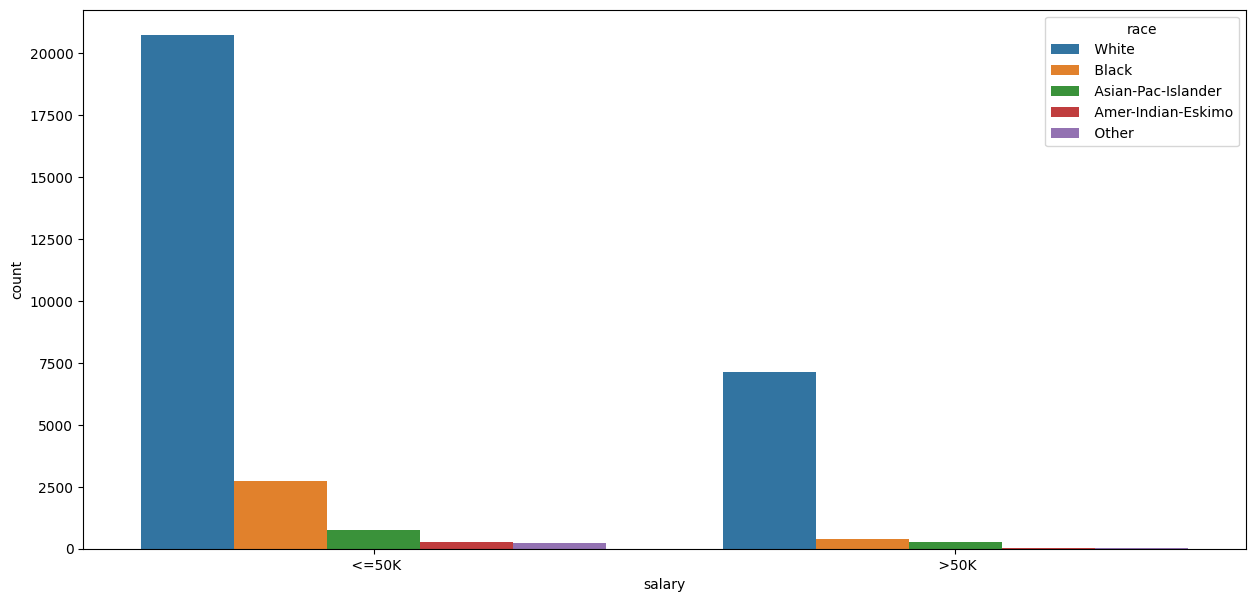

In [56]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='salary',hue='race')

<Axes: xlabel='salary', ylabel='count'>

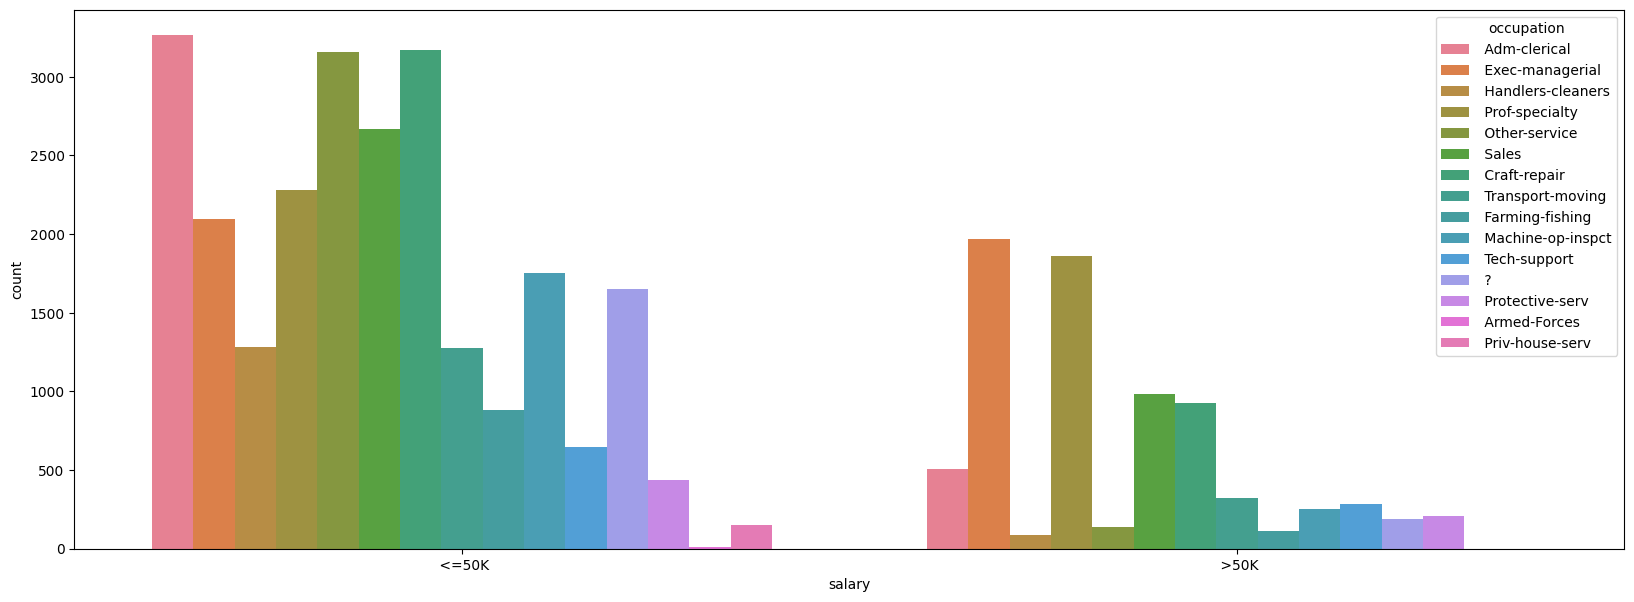

In [57]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='salary',hue='occupation')

<Axes: xlabel='salary', ylabel='count'>

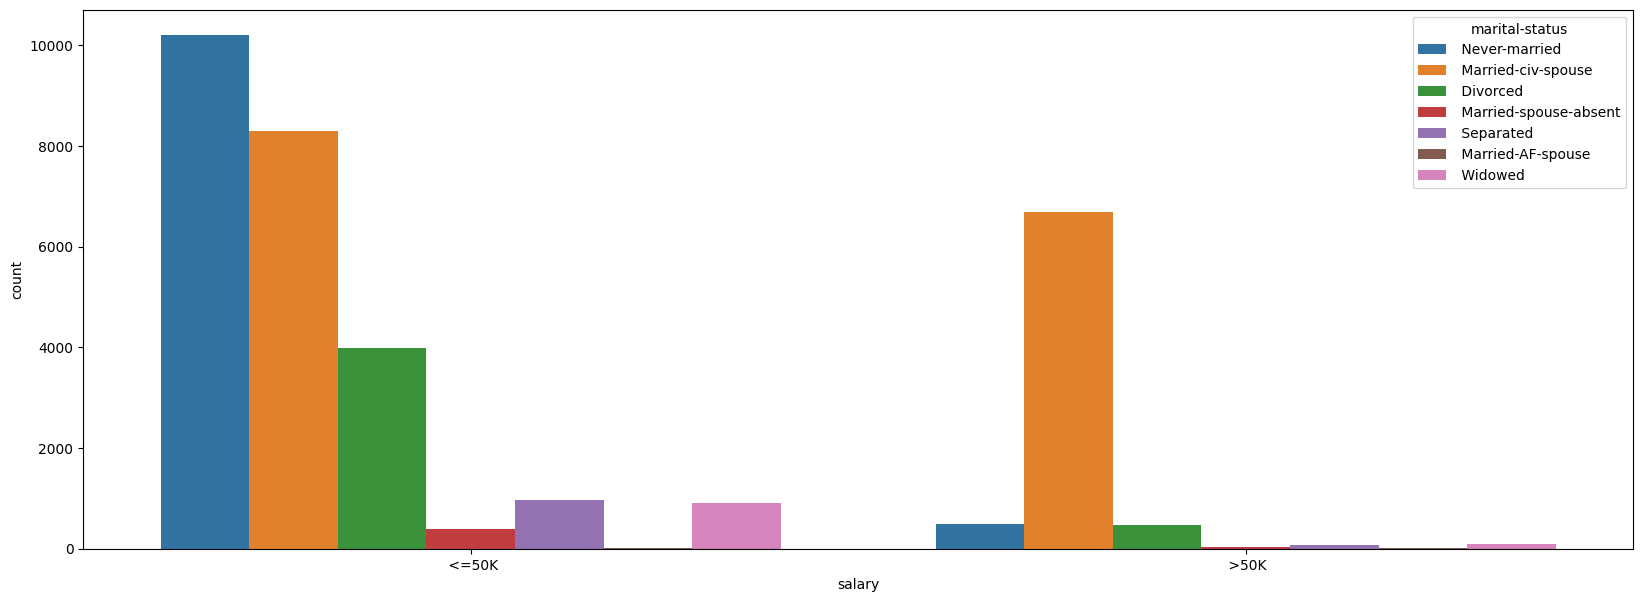

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='salary',hue='marital-status')

<Axes: xlabel='salary', ylabel='count'>

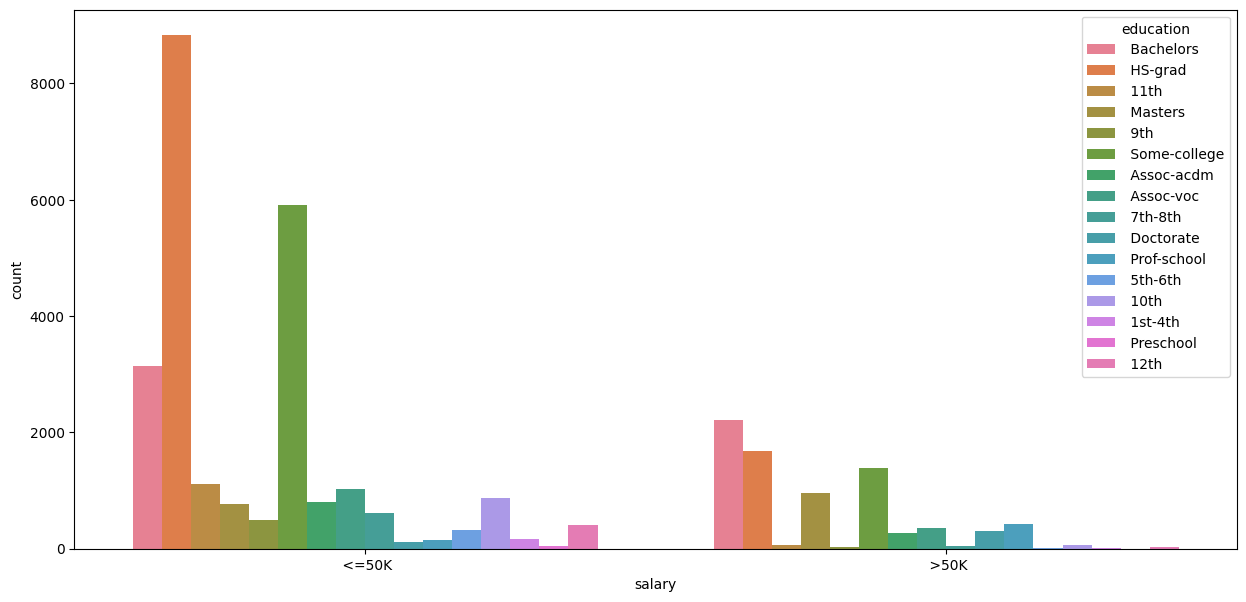

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='salary',hue='education')

In [60]:
#encoding
for column in cat.columns:
    df[column] = df[column].replace(' ?','other')

In [61]:
for column in df.columns:
    if df[column].dtype=="object":
        df[column] = df[column].str.replace(' ','')

In [62]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'other', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [63]:
df['country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'other', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['salary'] = encoder.fit_transform(df[['salary']])

d:\emppred\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week        country  salary  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [66]:
df.to_csv("artifacts/raw.csv",index=False)